In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("exams.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
data_obj=data.select_dtypes(include='object')
for i in data_obj.columns:
    data[i] = le.fit_transform(data[i])

In [5]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68
...,...,...,...,...,...,...,...,...
995,1,2,2,1,1,73,70,65
996,1,3,0,0,0,85,91,92
997,0,2,5,0,1,32,35,41
998,0,2,4,1,1,73,74,82


In [6]:
x = data.loc[:,data.columns != 'test preparation course']
y= data.loc[:,'test preparation course']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=6)

In [8]:
lst = []
for i in range(1,11):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(x_train,y_train)
    y_pred = knc.predict(x_test)
    acc = accuracy_score(y_pred,y_test)
    lst.append(acc)

In [9]:
lst

[0.585, 0.55, 0.655, 0.61, 0.67, 0.66, 0.675, 0.69, 0.695, 0.685]

In [10]:
x1 = list(range(1,11))
x1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Text(0.5, 1.0, 'KNN Model')

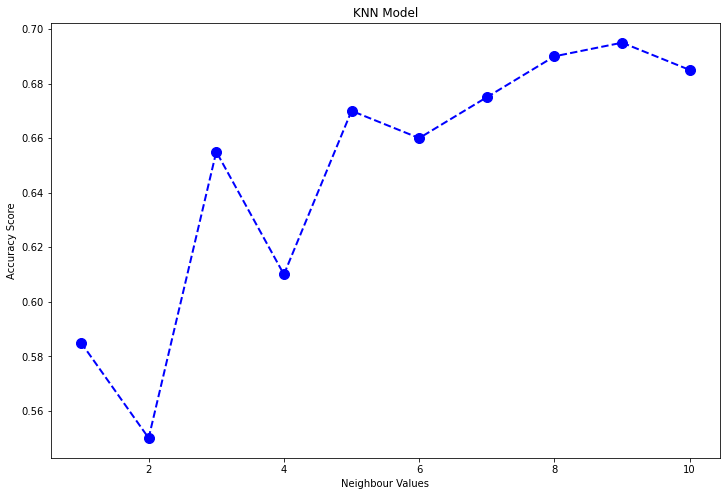

In [11]:
plt.figure(figsize=(20, ))
plt.plot(x1,lst,marker='o',color='b',linestyle='--',linewidth='2',markersize='10')
plt.xlabel('Neighbour Values')
plt.ylabel('Accuracy Score')
plt.title('KNN Model')